In [ ]:
pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1334 sha256=185aa4ac8d3fa16d22cdafa3ecd355853d10dad6c93f1dd532284942b8005fe5
  Stored in directory: /root/.cache/pip/wheels/c5/05/b3/f7b36dbaaf76de31b718cde792c953bfd11d2414a72f204b56
Successfully built unzip


In [ ]:
!unzip regresi_k

Archive:  regresi_k.zip
  inflating: ini/0.jpg               
  inflating: ini/100.jpg             
  inflating: ini/101.jpg             
  inflating: ini/102.jpg             
  inflating: ini/103.jpg             
  inflating: ini/104.jpg             
  inflating: ini/105.jpg             
  inflating: ini/106.jpg             
  inflating: ini/107.jpg             
  inflating: ini/108.jpg             
  inflating: ini/109.jpg             
  inflating: ini/10.jpg              
  inflating: ini/110.jpg             
  inflating: ini/111.jpg             
  inflating: ini/112.jpg             
  inflating: ini/113.jpg             
  inflating: ini/114.jpg             
  inflating: ini/115.jpg             
  inflating: ini/116.jpg             
  inflating: ini/117.jpg             
  inflating: ini/118.jpg             
  inflating: ini/119.jpg             
  inflating: ini/11.jpg              
  inflating: ini/120.jpg             
  inflating: ini/121.jpg             
  inflating: ini/122.jpg  

,file,x1,y1,x2,y2
0,0.jpg,0,0,80,103
1,1.jpg,22,0,196,97
2,2.jpg,176,120,194,138
3,3.jpg,161,0,199,54
4,4.jpg,26,0,199,120
...,...,...,...,...,...
495,495.jpg,71,77,95,101
496,496.jpg,72,0,182,90
497,497.jpg,70,57,199,199
498,498.jpg,30,58,199,199


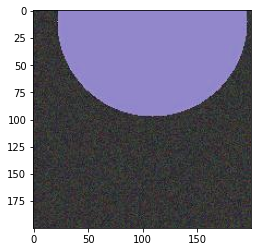

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.imshow(cv2.imread('ini/1.jpg'))
ini_csv = pd.read_csv('regresi_kotak (1).csv')
ini_csv

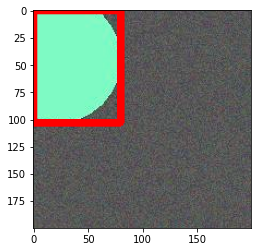

In [ ]:
gambar = cv2.imread('ini/0.jpg')
ini = cv2.rectangle(gambar,(0,0),(80,103),(255,0,0),5)
plt.imshow(ini)

In [ ]:
gambar.shape

(200, 200, 3)

In [ ]:
x = []
y = ini_csv.values[:,1:]/200
y = y.astype(float)
for info in ini_csv.values:
  gambar = cv2.imread('ini/'+info[0])
  gambar = gambar/255
  x.append(gambar)
x = np.asarray(x).astype(float)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

model = Sequential()

model.add(Conv2D(8,(3,3),input_shape=x.shape[1:],activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='sigmoid'))
model.compile(optimizer = 'adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 8)       224       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 16)        1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)      

In [ ]:
history = model.fit(x,y,batch_size=1,epochs=20,validation_split=0.1)

Epoch 1/20
450/450 [==============================] - 23s 50ms/step - loss: 0.0346 - val_loss: 0.0281
Epoch 2/20
450/450 [==============================] - 23s 52ms/step - loss: 0.0144 - val_loss: 0.0182
Epoch 3/20
450/450 [==============================] - 22s 49ms/step - loss: 0.0102 - val_loss: 0.0125
Epoch 4/20
450/450 [==============================] - 22s 49ms/step - loss: 0.0075 - val_loss: 0.0150
Epoch 5/20
450/450 [==============================] - 23s 52ms/step - loss: 0.0068 - val_loss: 0.0115
Epoch 6/20
450/450 [==============================] - 22s 50ms/step - loss: 0.0103 - val_loss: 0.0137
Epoch 7/20
450/450 [==============================] - 24s 52ms/step - loss: 0.0056 - val_loss: 0.0104
Epoch 8/20
450/450 [==============================] - 22s 49ms/step - loss: 0.0040 - val_loss: 0.0090
Epoch 9/20
450/450 [==============================] - 22s 49ms/step - loss: 0.0051 - val_loss: 0.0119
Epoch 10/20
450/450 [==============================] - 24s 53ms/step - loss: 0.004

In [ ]:
x_test = []
x_test.append(x[4])
x_test.append(x[12])
x_test = np.array(x_test)
y_pred = model.predict(x_test)
y_pred = (y_pred*200).astype(int)
y_pred

1/1 [==============================] - 0s 113ms/step


array([[ 32,   0, 196, 112],
       [  2, 128,  21, 164]])

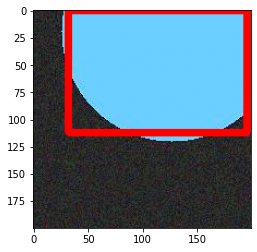

In [ ]:
gambar = x[4].copy()
gambar = cv2.rectangle(gambar,y_pred[0][0:2],y_pred[0][2:4],(255,0,0),5)
plt.imshow(gambar)